In [ ]:
#import library
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
#tampilkan data csv
data = pd.read_csv("diabetes.csv")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
#pilih data yang akan dipakai 
data = data.loc[:,["Age","BloodPressure"]]

In [ ]:
#tampilkan data yang dipakai
data

,Age,BloodPressure
0,50,72
1,31,66
2,32,64
3,21,66
4,33,40
...,...,...
763,63,76
764,27,70
765,30,72
766,47,60


In [ ]:
#melihat informasi data yang dipakai
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Age            768 non-null    int64
 1   BloodPressure  768 non-null    int64
dtypes: int64(2)
memory usage: 12.1 KB


In [ ]:
#Melihat statistical description dari data mulai dari mean, kuartil, standard deviation dll.
data.describe()

,Age,BloodPressure
count,768.000000,768.000000
mean,33.240885,69.105469
std,11.760232,19.355807
min,21.000000,0.000000
25%,24.000000,62.000000
50%,29.000000,72.000000
75%,41.000000,80.000000
max,81.000000,122.000000


In [ ]:
#cek data kosong
data.isnull().sum()

Age              0
BloodPressure    0
dtype: int64

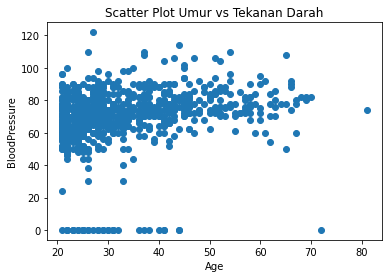

In [ ]:
#visualisasi data yang dimiliki
plt.scatter(data['Age'], data['BloodPressure'])
plt.xlabel('Age')
plt.ylabel('BloodPressure')
plt.title('Scatter Plot Umur vs Tekanan Darah')
plt.show()

In [ ]:
#Mengetahui nilai korelasi 
data.corr()

,Age,BloodPressure
Age,1.000000,0.239528
BloodPressure,0.239528,1.000000


In [ ]:
#buat variabel x dan y.
x = data['Age'].values.reshape(-1,1)
y = data['BloodPressure'].values.reshape(-1,1)

In [ ]:
#split data kita menjadi training and testing dengan porsi 80:20.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [ ]:
#bikin object linear regresi dan training model menggunakan training data yang sudah displit sebelumnya.
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

LinearRegression()

In [ ]:
#mencari nilai slope/koefisien (m) dan intercept (b).
print(lin_reg.coef_)
print(lin_reg.intercept_)

[[0.35848571]]
[57.51405205]


In [ ]:
#mencari nilai accuracy score dari model kita menggunakan testing data yang sudah displit sebelumnya.
lin_reg.score(x_test, y_test)

0.06701210927671453

Text(0.5, 1.0, 'Plot Umur vs Tekanan Darah')

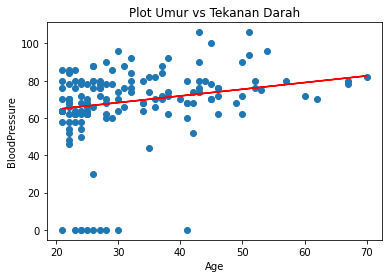

In [ ]:
#visualisasi Regression Line menggunakan data testing.
y_prediksi = lin_reg.predict(x_test)
plt.scatter(x_test, y_test)
plt.plot(x_test, y_prediksi, c='r')
plt.xlabel('Age')
plt.ylabel('BloodPressure')
plt.title('Plot Umur vs Tekanan Darah')

In [ ]:
#prediksi tekanan darah 
lin_reg.predict([[15]])

array([[62.89133777]])

In [ ]:
#prediksi tekanan darah 
lin_reg.predict([[62]])

array([[79.74016637]])